## 分类数据的可视化分析
- 观测点的直接展示：swarmplot， stripplot
- 观测点近似分布展示：boxplot，violinplot
- 均值和置信区间的展示：barplot，pointplot

In [7]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', color_codes=True)
import warnings

warnings.filterwarnings('ignore')
np.random.seed(2017)
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


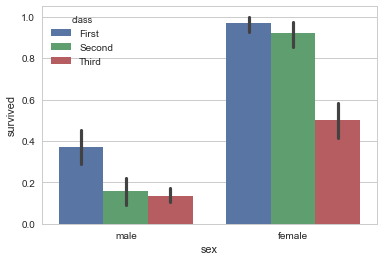

In [9]:
titanic.head()
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

### 分类散点图
当有一维数据是分类数据时，散点图成条带形状

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


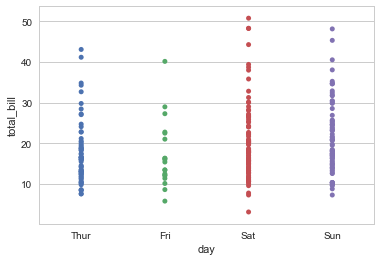

In [11]:
tips.head()
sns.stripplot(x='day', y='total_bill', data=tips)

散点都在一起看不清楚？还记得抖动的方法咩~

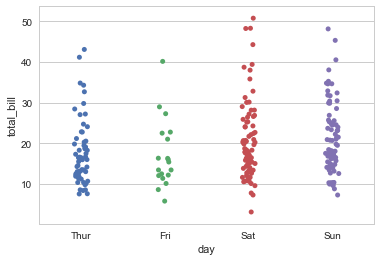

In [16]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=.08)

另一种处理办法是蜂群图，避免散点重叠,按照人字形展开，提现分布状况

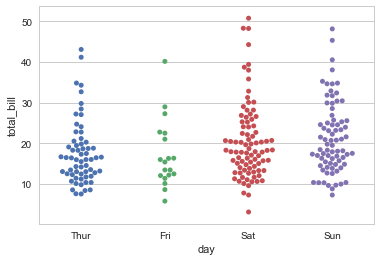

In [17]:
sns.swarmplot(x='day', y='total_bill', data=tips)

hue:相当于 groupby

在每一个一级分类内部可能存在二级分类

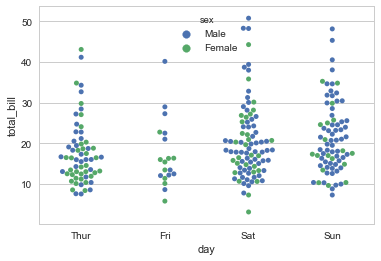

In [18]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)

## 分类分布图
### 箱图
上边缘，上四分位数，中位数，下四分位数，下边缘

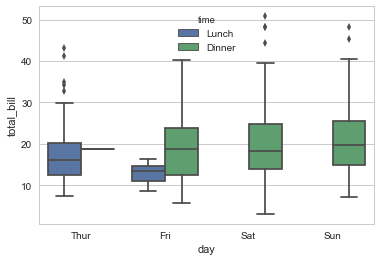

In [20]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)

### 提琴图
箱图 + KDE(Kernel Distribition Estimation)
- 白点：中位数
- 黑线左：25%  黑线右：75%

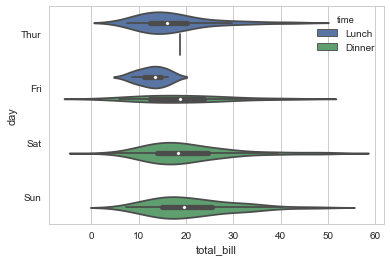

In [21]:
sns.violinplot(x='total_bill', y='day', hue='time', data=tips)

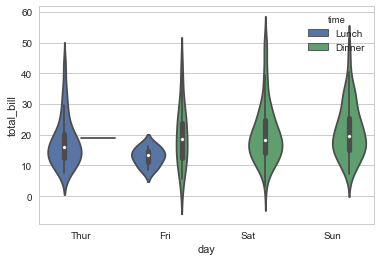

In [24]:
sns.violinplot(x='day', y='total_bill', hue='time', data=tips)

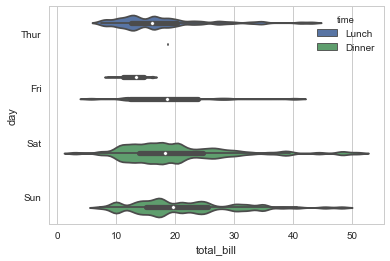

In [25]:
sns.violinplot(x='total_bill', y='day', hue='time', data=tips, bw=.1, scale='count', scale_hue=False)

非对称提琴图

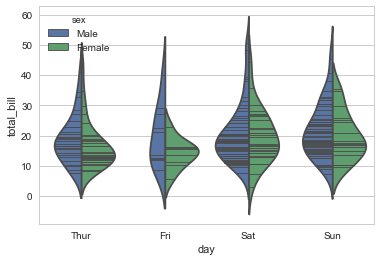

In [26]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, inner='stick')

## 分类统计估计图
### 统计柱状图

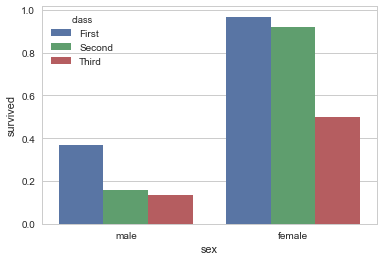

In [27]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ci=None)

### 灰度柱状图

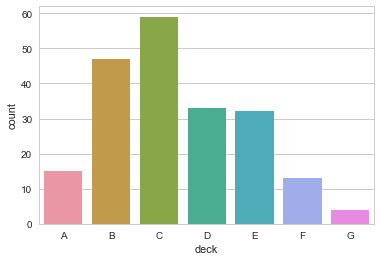

In [28]:
sns.countplot(x='deck', data=titanic)

### 点图
均值，标准差

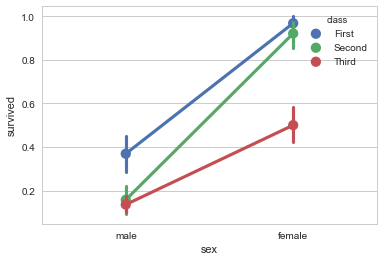

In [29]:
sns.pointplot(x='sex', y='survived', hue='class', data=titanic)

修改颜色，标记，线型

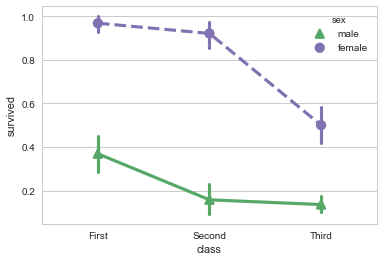

In [30]:
sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
             palette={'male':'g', 'female':'m'},
             markers=['^','o'], linestyles=['-','--'])

### 分类子图

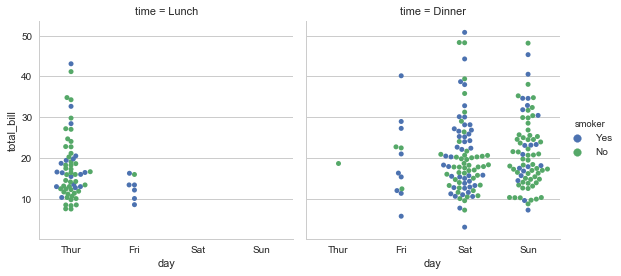

In [31]:
sns.factorplot(x='day', y='total_bill', hue='smoker',col='time', data=tips, kind='swarm')

多分类标准子图

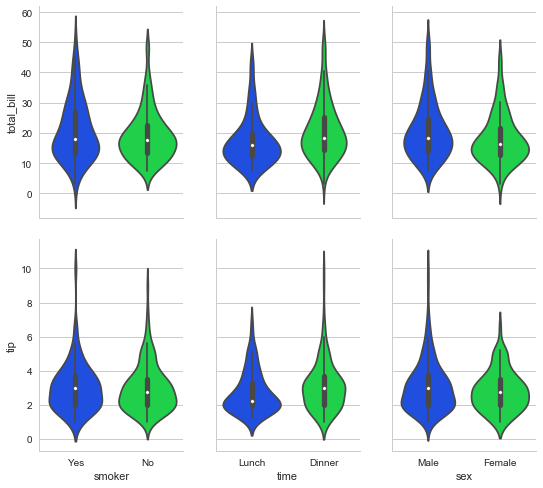

In [32]:
g = sns.PairGrid(tips, 
                 x_vars=['smoker', 'time', 'sex'],
                 y_vars=['total_bill', 'tip'],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette='bright')